In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.linalg import eig

<h1>Grellier Gibson L - 00  1940</h1>

In [2]:
A = -4.870808371497193E+02

B = -7.040688233980210E-01

C = 4.120054533938742E+00

D = -4.306401301536174E+02

E = 4.977584629453556E-01

F = -4.580063958661442E+00

G = 1.139460743838969E+02

H = -3.629481318224734E-01

I = 5.967975949921605E+00

J = -2.931127947916925E+02

K = 7.910758005121563E-01

L = 1.073424492625578E+00

M = 5.936152674811037E+02

N = 5.828210191651341E-01

O = 6.864819467929281E+00

P = 6.659725076181603E+01

Q = 8.798978774860676E-01

R = 1.324604536132214E-03

AA = -3.062480293785913E-02

BB = 2.244453482002917E+00

CC = -8.624304510787958E+00

S = 6.947610996856965E-02

T = -2.515897740961353E-02

U = 1.718899684067937E-02

V = -1.937105082084855E-03

W = 6.223972835296340E-05

Y = 4.677375788356206E+01

Z = 3.321710132644738E+01

BL = 19.324

x = np.linspace(0,BL,500) # Body length for this model is 19.324

y = (A*np.sin(B*x+C) + D*np.sin(E*x+F) + G*np.sin(H*x+I) + J*np.sin(K*x+L) + M*np.sin(N*x+O) +P*np.sin(Q*x+R) +AA*np.sin(BB*x+CC))* (S + T*x + U*x**2 + V*x**3 + W*x**4) * np.arctan(Y*x) * np.arctan(Z*(BL-x))

# # plot the function
# plt.plot(x,y, 'r')
# plt.xlim(0, 19.5)
# plt.ylim(0)
# # plt.gca().set_aspect('equal', adjustable='box')
# plt.show()


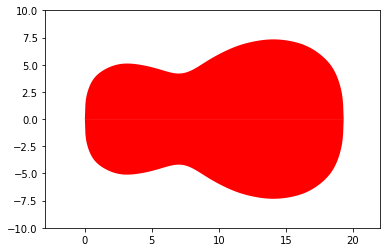

In [3]:
y2 = -y

# plot the function
plt.fill(x,y2, 'r')
plt.fill(x,y, 'r')
plt.xlim(-3, 22)
plt.ylim(-10,10)
# plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [96]:
A = -4.870808371497193E+02

B = -7.040688233980210E-01

C = 4.120054533938742E+00

D = -4.306401301536174E+02

E = 4.977584629453556E-01

F = -4.580063958661442E+00

G = 1.139460743838969E+02

H = -3.629481318224734E-01

I = 5.967975949921605E+00

J = -2.931127947916925E+02

K = 7.910758005121563E-01

L = 1.073424492625578E+00

M = 5.936152674811037E+02

N = 5.828210191651341E-01

O = 6.864819467929281E+00

P = 6.659725076181603E+01

Q = 8.798978774860676E-01

R = 1.324604536132214E-03

AA = -3.062480293785913E-02

BB = 2.244453482002917E+00

CC = -8.624304510787958E+00

S = 6.947610996856965E-02

T = -2.515897740961353E-02

U = 1.718899684067937E-02

V = -1.937105082084855E-03

W = 6.223972835296340E-05

Y = 4.677375788356206E+01

Z = 3.321710132644738E+01

BL = 19.324

# Make x,y grid 
x_upper_lim = 22.0
x_lower_lim = -3.0

y_upper_lim = 10.0
y_lower_lim = -10.0

x_origin = 0
y_origin = 0

# Number of grid points

Nx = 50
Ny = 50

x = np.linspace(x_lower_lim,x_upper_lim,Nx)
y = np.linspace(y_lower_lim,y_upper_lim,Ny)

x_boundary = np.linspace(0,BL,Nx)
y_upper_boundary = (A*np.sin(B*x_boundary+C) + D*np.sin(E*x_boundary+F) + G*np.sin(H*x_boundary+I) + J*np.sin(K*x_boundary+L) + M*np.sin(N*x_boundary+O) +P*np.sin(Q*x_boundary+R) +AA*np.sin(BB*x_boundary+CC))* (S + T*x_boundary + U*x_boundary**2 + V*x_boundary**3 + W*x_boundary**4) * np.arctan(Y*x_boundary) * np.arctan(Z*(BL-x_boundary))
y_lower_boundary = -y_upper_boundary

dx = x[1] - x[0] # Mesh Size
dy = y[1] - y[0]

# Create Meshgrid: 

X_grid, Y_grid = np.meshgrid(x, y) # X is size x^2, Y is size y^2

# Define grid points that are inside the guitar shape

X_inside = np.zeros((Nx, Ny), dtype=bool)
Y_inside = np.zeros((Nx, Ny), dtype=bool)

for i in range(Nx):
    for j in range(Ny):
        if X_grid[i,j] < x_boundary[-1] and X_grid[i,j] > x_boundary[0]:
            if Y_grid[i,j] < y_upper_boundary[j] and Y_grid[i,j] > y_lower_boundary[j]:
#                 print(f'Point ({x[i]}, {y[i]}) lies inside boundary')
                X_inside[i,j] = True
                Y_inside[i,j] = True

# Then compare with all grid points

# Find grid points on the boundary of the guitar 


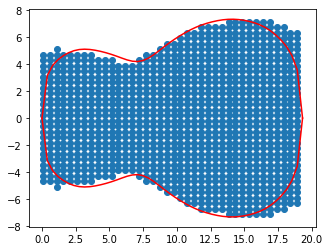

In [97]:
# create the figure
fig, ax = plt.subplots(1)
ax.plot(x_boundary, y_lower_boundary, 'r')
ax.plot(x_boundary, y_upper_boundary, 'r')
ax.set_aspect(1)
ax.scatter(X_grid[X_inside], Y_grid[Y_inside])
plt.show()

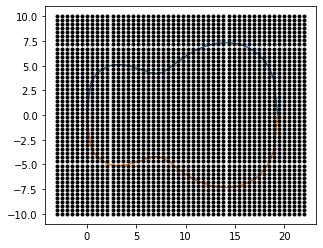

In [98]:
# create the figure
fig, ax = plt.subplots(1)
plt.plot(x_boundary,y_upper_boundary)
plt.plot(x_boundary,y_lower_boundary)
# plt.plot(x_outside_boundary,y_outside_upper)
# plt.plot(X_grid[],Y_grid[])
ax.set_aspect(1)
plt.plot(X_grid, Y_grid, marker='.', color='k', linestyle='none')
# ax.scatter(X[outside], Y[outside])
# ax.scatter(X[inside], Y[inside])
plt.show()